# Breast Cancer Prediction 
## Group members: Nilakshi Pokharkar, Shefali Gokarn, Mithika Pawar 

Description:

Breast  cancer  is  a  tumor  that  develops  in  the  breast  cells  and  is  one  of  the  most 
common cancers in women. Women are also at risk from BC, the second most life-
threatening disease after lung  cancer  [1].  Tests like mammograms and Pap tests are 
used to regularly check people for signs of cancer or precancerous cells that can turn 
into cancer. The crucial part here is of early detection and classification of the tumor. 
Moreover, the manual detection, like aforementioned tests can be time-consuming, 
laborious  work  and  more  possibility  of  errors  and  incorrect  classification.   Thus, 
automatic approaches are helpful in saving time and reducing likelihood of human 
error. 

### Reference & data Collection :

[1] [Intelligent Hybrid Deep Learning Model for Breast Cancer Detection](https://www.proquest.com/docview/2711291182?parentSessionId=iRg5bPwA7qTZa%2Fvj0i%2B%2FP22DhKYG%2BDQH1xgA25nhUYU%3D&pq-origsite=summon)

[2] [Enhanced  CNN  Architecture  for  Invasive Ductal Carcinoma Detection  in 
Breast Histopathology Images](https://ieeexplore.ieee.org/document/9694114)

[3] [Computer-aided detection of breast cancer on the Wisconsin dataset: An artificial neural networks approach](https://0-www-sciencedirect-com.wizard.umd.umich.edu/science/article/pii/S1746809421007382?via%3Dihub)

[4] [BREAST CANCER PREDICTION USING
MACHINE LEARNING](https://www.researchgate.net/profile/Ramik-Rawal/publication/341508593_BREAST_CANCER_PREDICTION_USING_MACHINE_LEARNING/links/5ec4d760a6fdcc90d685ee09/BREAST-CANCER-PREDICTION-USING-MACHINE-LEARNING.pdata)

[5] [Breast Cancer Wisconsin (Diagnostic) data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

# Importing libraries

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 3.8 MB/s 
     |████████████████████████████████| 81 kB 2.6 MB/s 
     |████████████████████████████████| 209 kB 59.6 MB/s 
     |████████████████████████████████| 78 kB 2.3 MB/s 
     |████████████████████████████████| 147 kB 20.8 MB/s 
     |████████████████████████████████| 50 kB 2.1 MB/s 
     |████████████████████████████████| 112 kB 49.3 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=b9d7d0d62aa4f6c6cb65dde658c545ba04a905410ada70dfc9340a6d9c57bd1f
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
#from matplotlib.colors import ListedColormap
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import matthews_corrcoef
import optuna
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
from sklearn.metrics import plot_confusion_matrix ,classification_report

In [ ]:
import warnings 
warnings.filterwarnings("ignore")


# Loading the data

- It is a multivariate dataset with 569 instances[5].
- Each instance has 32 attributes which describes the characteristics of the cell nuclei.

Attribute Information:

1. ID number
2. Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/SJUACM/Machine-Learning-Applications/main/Breast%20Cancer%20Detection/BreastCancerDataset.csv")

# Taking a peek at the data

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Data cleaning

checking is any null values are present in the data

In [ ]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#dropping the unnecessary column - '*id*'



In [ ]:
data.drop(columns = ["id"], inplace = True, axis =1 )

# Checking if the data is biased

B    357
M    212
Name: diagnosis, dtype: int64


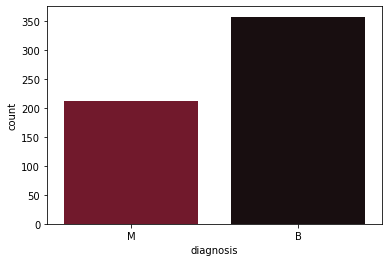

In [ ]:
sns.countplot(data["diagnosis"],palette= ["#800a24","#1a0c0f"]);
print(data.diagnosis.value_counts())

Considering 1 for M and 0 for B for better performance of the model ahead

In [ ]:
data["diagnosis"] = [1 if i.strip()=="M" else 0 for i in data.diagnosis]

# Expolatory Data Analysis

In [ ]:
# Shape of our dataset
data.shape

# Info our dataset
data.info()

# Describe our dataset
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
corr_mat = data.select_dtypes("number").corr()

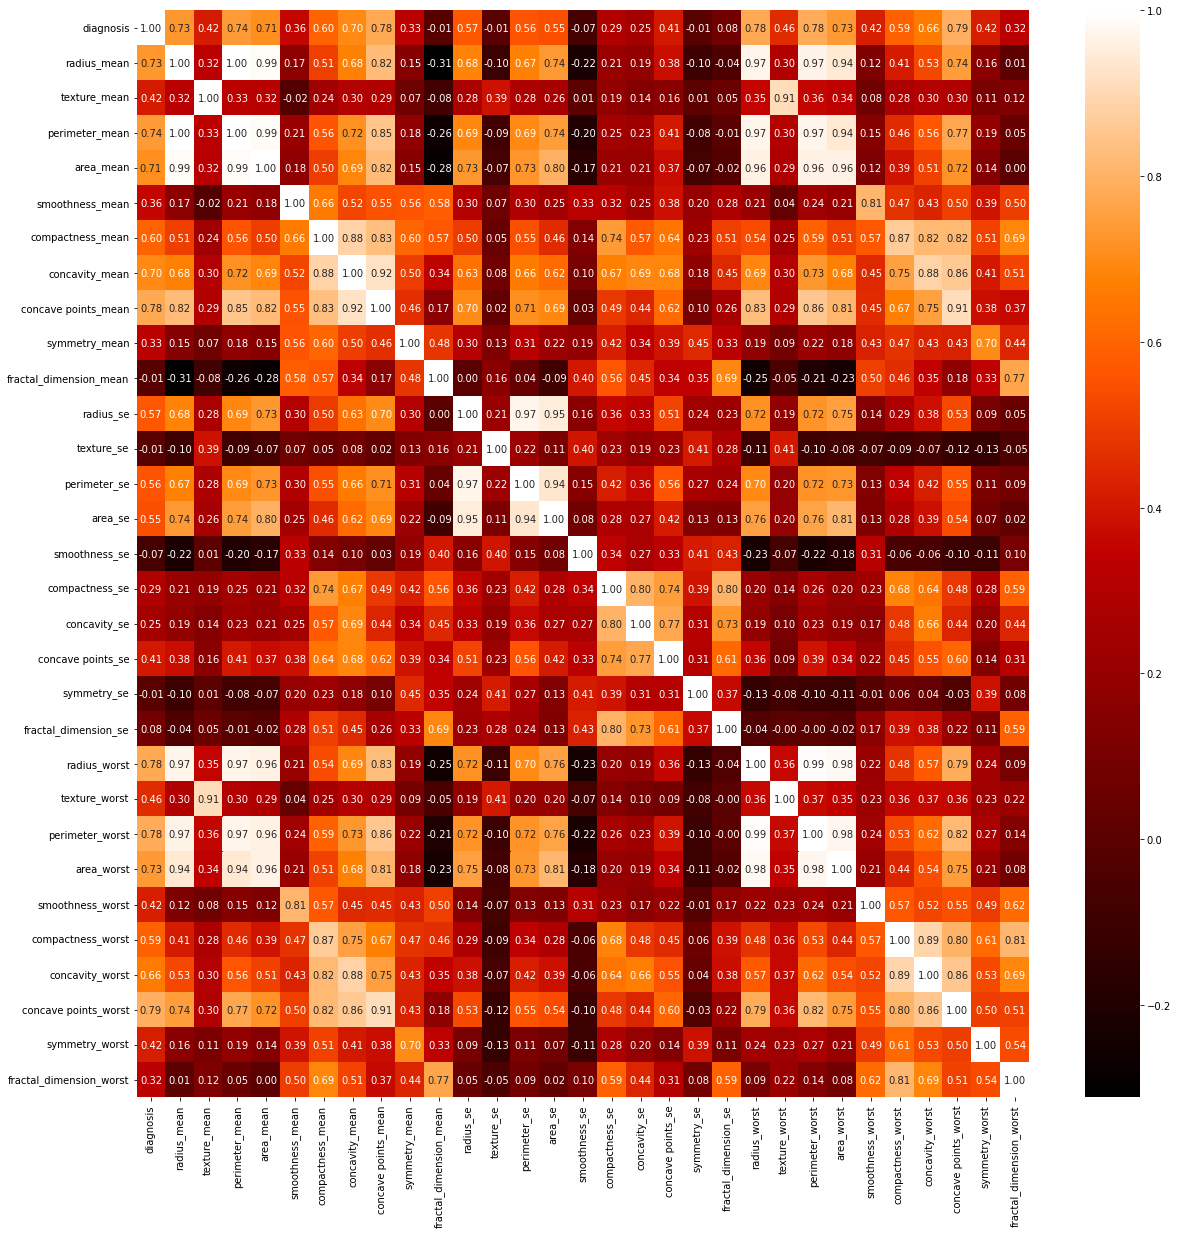

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat, annot = True, fmt = ".2f", cmap="gist_heat");

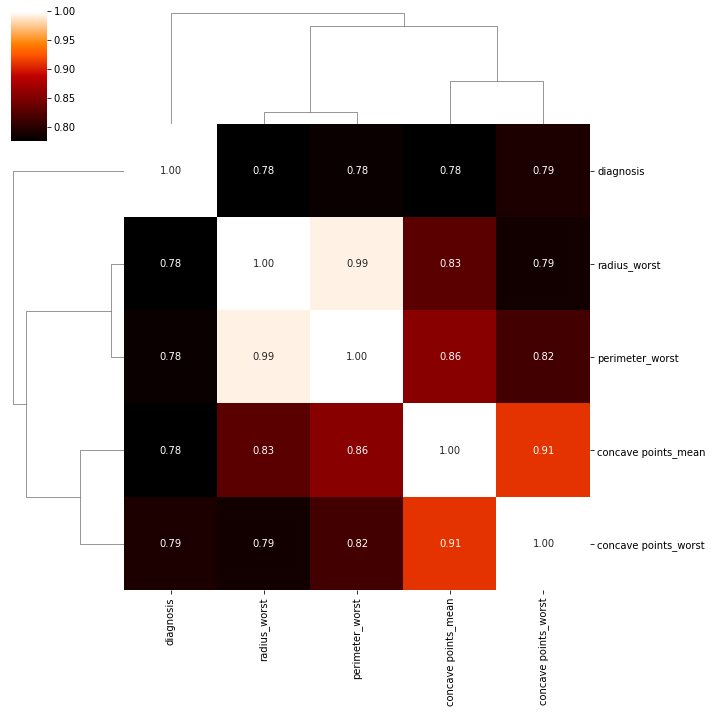

In [ ]:
treshold = 0.75
filter = np.abs(corr_mat["diagnosis"])>treshold
corr_feat = corr_mat.columns[filter].to_list()
sns.clustermap(data[corr_feat].corr(), annot =True, fmt = ".2f",cmap='gist_heat');

In [ ]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
# Getting Mean Columns with diagnosis
m_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean']

# Getting Se Columns with diagnosis
s_col = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']

# Getting Worst column with diagnosis
w_col = ['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

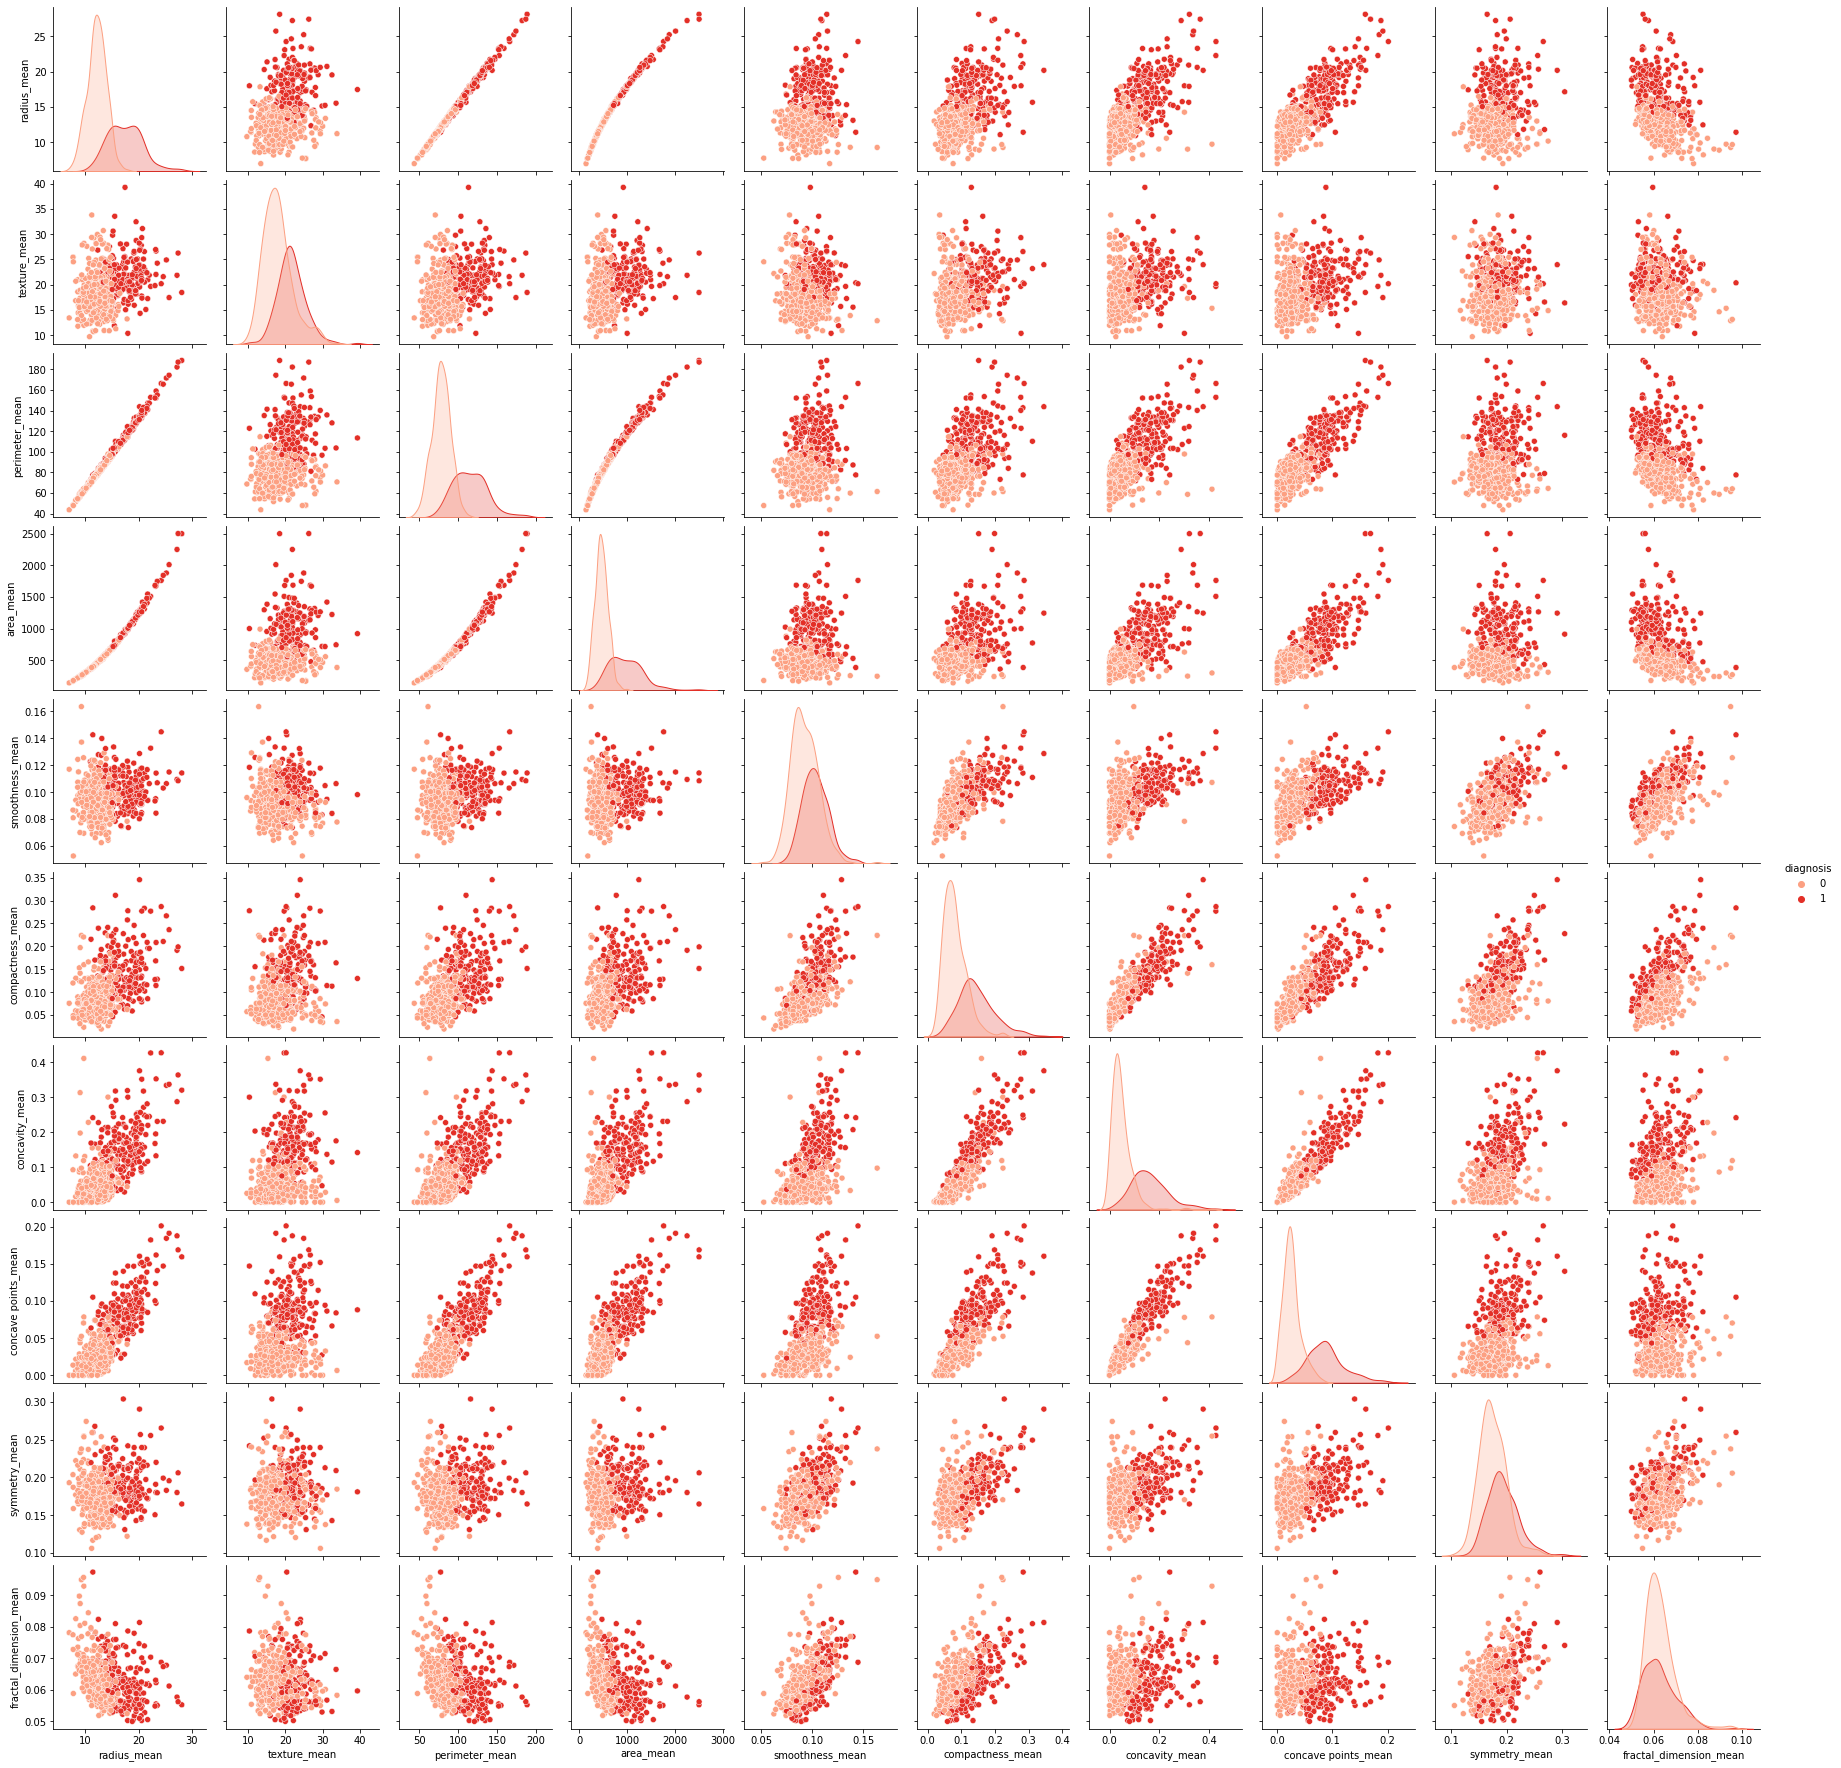

In [ ]:
sns.pairplot(data[m_col],hue = 'diagnosis', palette='Reds')

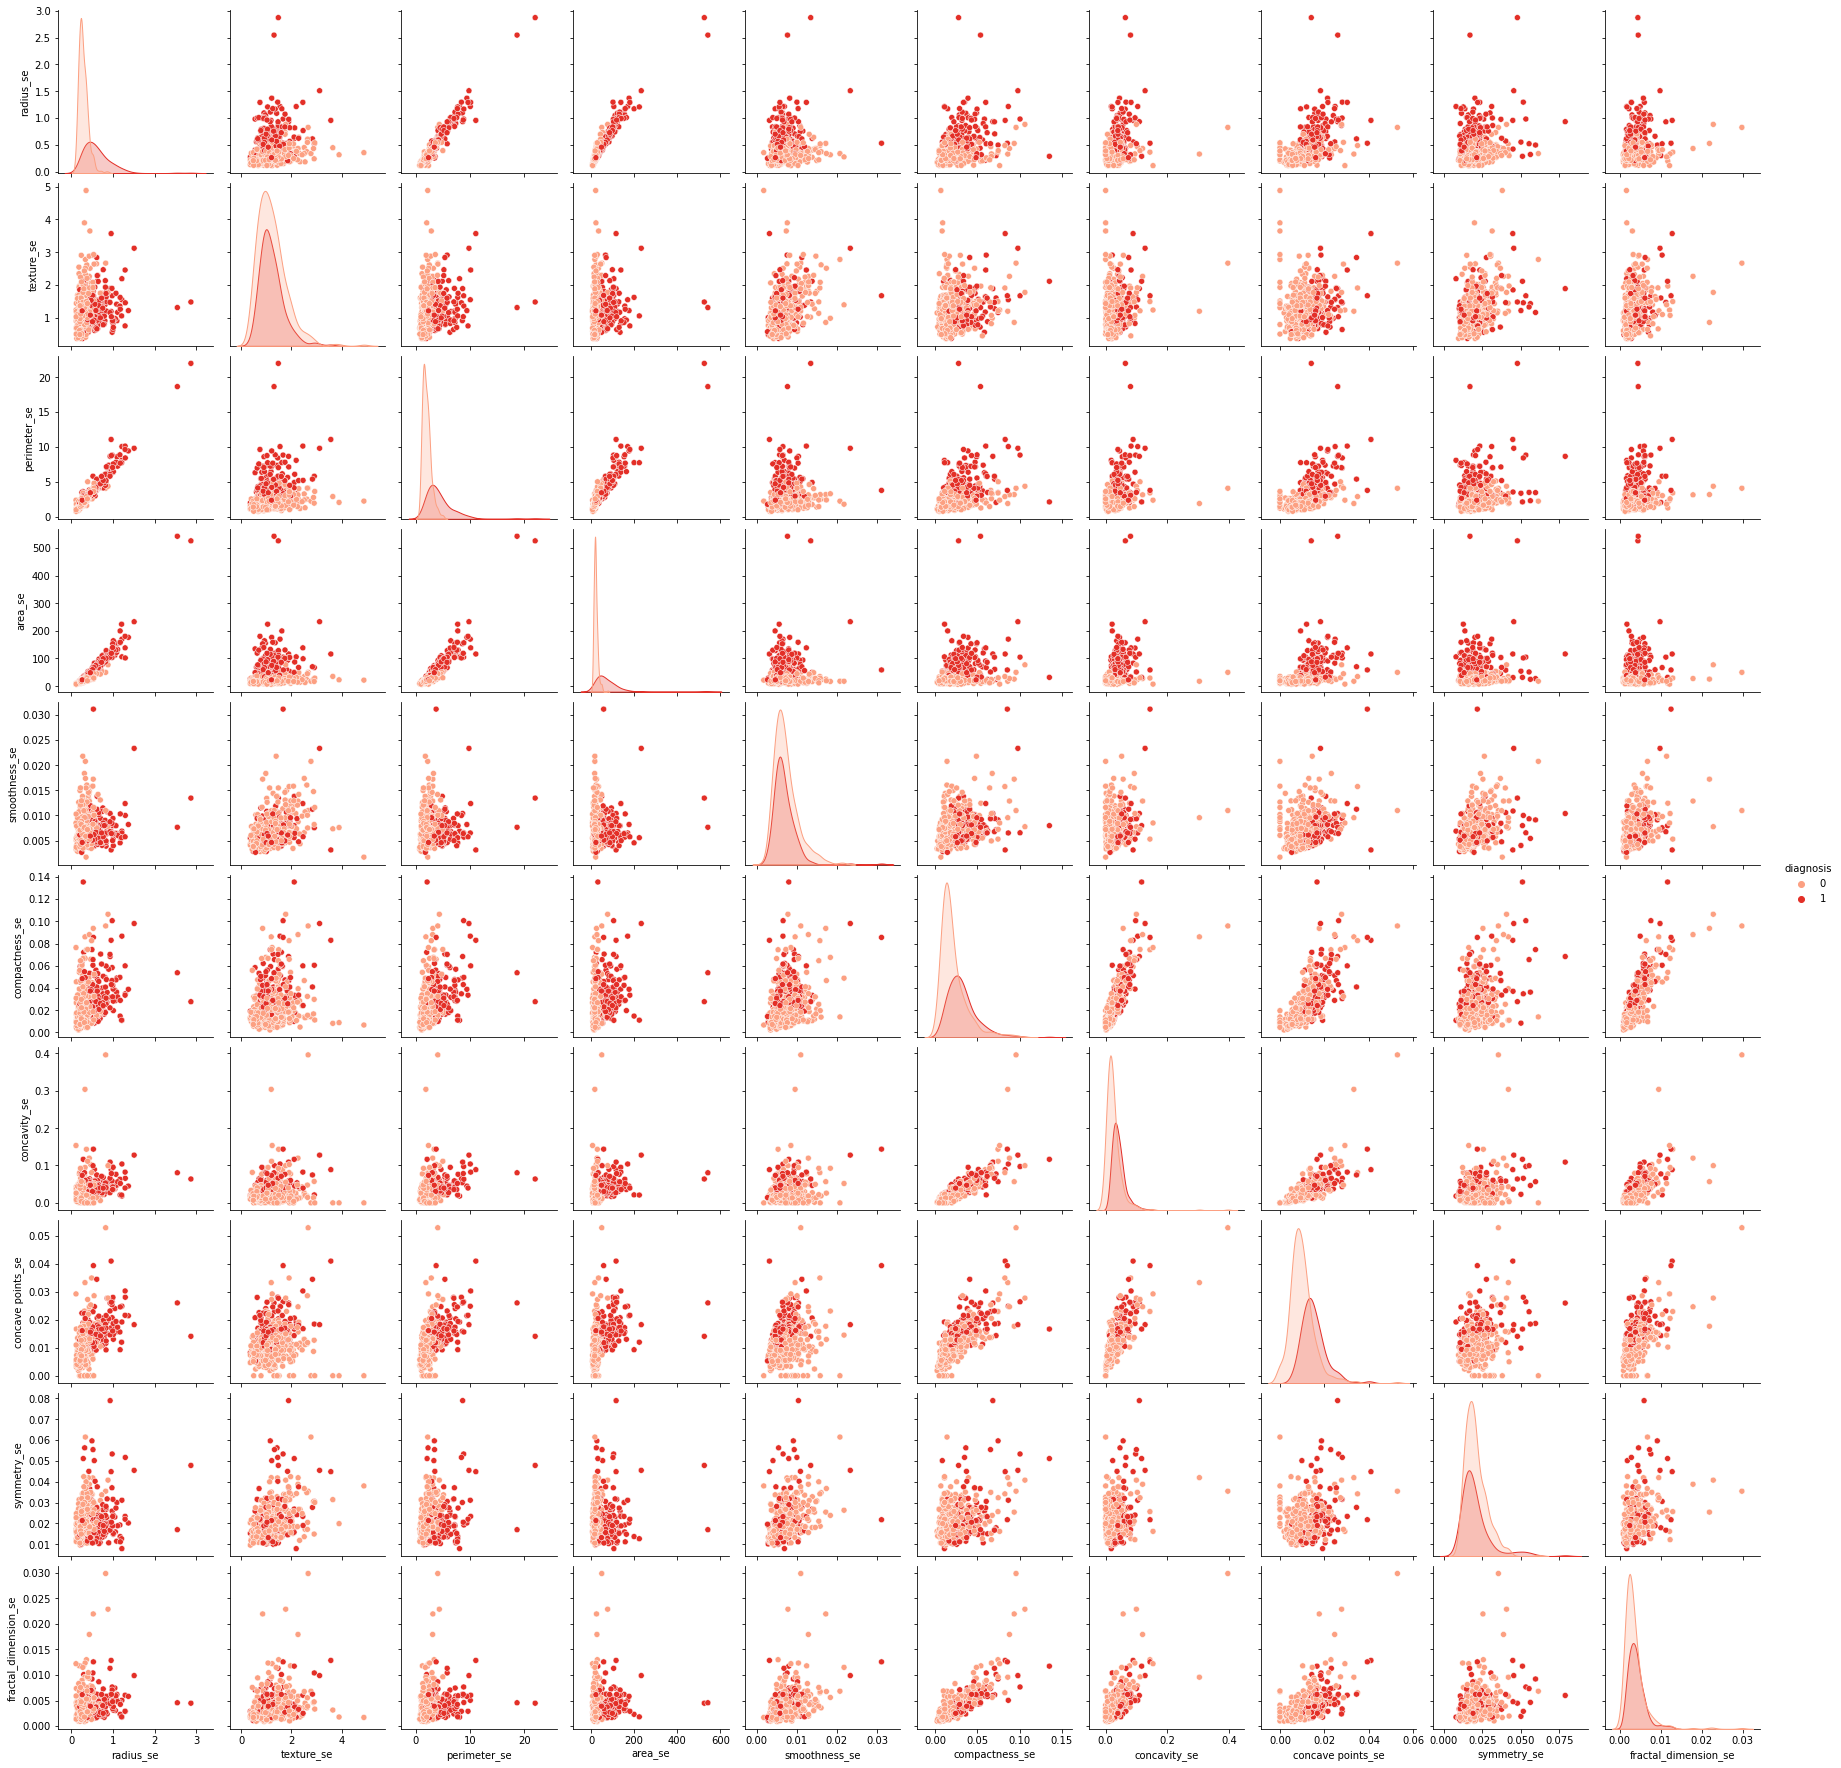

In [ ]:
sns.pairplot(data[s_col],hue = 'diagnosis', palette='Reds')

# Phase 2

#K- nearest neighbours 
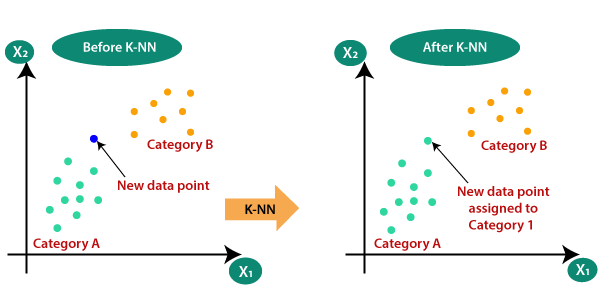

k-NN is a type of classification where the function is only approximated locally and all computation is deferred until function evaluation. Since this algorithm relies on distance for classification, if the features represent different physical units or come in vastly different scales then normalizing the training data can improve its accuracy dramatically. It uses proximity to make classifications or predictions about the grouping of an individual data point.

# Spliting data into features - X and target value - y

In [ ]:
x = data.drop(["diagnosis"], axis = 1)
y = data.diagnosis

Train - test spliting in 70-30 ratio

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42, shuffle=True)

# Model creation and fitting

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Created Model
knn = KNeighborsClassifier(n_neighbors=2)

# Fit
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=2)

# Prediction

In [ ]:

y_pred_knn = knn.predict(x_test)

# Confusion matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)
print("CM: ", cm)

CM:  [[107   1]
 [  9  54]]


# Accuracy

In [ ]:
acc = accuracy_score(y_test, y_pred_knn)*100
print("Basic Knn Acc: ", acc)

Basic Knn Acc:  94.15204678362574


# Mathews Correlatiion Coefficient

In [ ]:
matthews_corrcoef(y_test, y_pred_knn)

0.8756046255119618

# Knn score

In [ ]:
score = knn.score(x_test, y_test)
print("Score: ", score)

Score:  0.9415204678362573


# Classification Report

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       108
           1       0.98      0.86      0.92        63

    accuracy                           0.94       171
   macro avg       0.95      0.92      0.94       171
weighted avg       0.94      0.94      0.94       171



# MLP with keras 

A fully connected multi-layer neural network is called a Multilayer Perceptron (MLP). In our model, we have implemented MLP with 3 layers including one hidden layer. A NN has tendency to memorize its training data. This cause the failre in case when the model is subjected to the test data. This may lead to overfitting/underfitting and thus to avoid this we have used Dropout layer.

# Model Creation and fitting

In [ ]:
model = keras.Sequential([
        layers.Dense(512, activation='relu'), 
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        #layers.Dense(512, activation='relu'),
        #layers.Dropout(0.8),
        layers.Dense(1, activation='sigmoid')
    ])
#tf.keras.optimizers.Adam(learning_rate=0.009)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=300, batch_size=300)

Epoch 1/300
2/2 [==============================] - 1s 15ms/step - loss: 47.9703 - accuracy: 0.4774
Epoch 2/300
2/2 [==============================] - 0s 14ms/step - loss: 45.6465 - accuracy: 0.5603
Epoch 3/300
2/2 [==============================] - 0s 14ms/step - loss: 32.9564 - accuracy: 0.4221
Epoch 4/300
2/2 [==============================] - 0s 14ms/step - loss: 24.8505 - accuracy: 0.4774
Epoch 5/300
2/2 [==============================] - 0s 13ms/step - loss: 21.6571 - accuracy: 0.6055
Epoch 6/300
2/2 [==============================] - 0s 14ms/step - loss: 24.8502 - accuracy: 0.6432
Epoch 7/300
2/2 [==============================] - 0s 12ms/step - loss: 11.3067 - accuracy: 0.6332
Epoch 8/300
2/2 [==============================] - 0s 15ms/step - loss: 17.6563 - accuracy: 0.5075
Epoch 9/300
2/2 [==============================] - 0s 13ms/step - loss: 14.8719 - accuracy: 0.5754
Epoch 10/300
2/2 [==============================] - 0s 14ms/step - loss: 10.0059 - accuracy: 0.6608
Epoch 11/

# Prediction

In [ ]:
y_pred_mlp= model.predict(x_test);
y_pred_mlp = (y_pred_mlp > 0.5)

6/6 [==============================] - 0s 3ms/step


# Confusion Matrix

In [ ]:
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
cm_mlp

array([[103,   5],
       [  4,  59]])

# Accuracy 

In [ ]:
acc_mlp = accuracy_score(y_test, y_pred_mlp)*100
acc_mlp

94.73684210526315

# Mathews Correlatiion Coefficient

In [ ]:
matthews_corrcoef(y_test, y_pred_mlp)

0.8873471226071058

# Classification Report

In [ ]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       108
           1       0.92      0.94      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



# KNN using GridSearchCV

GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. It is a technique for finding the optimal parameter values from a given set of parameters in a grid. It’s essentially a cross-validation technique.

# Model creation and fitting

In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 30))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', refit = True, n_jobs=-1, return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

Fitting 10 folds for each of 58 candidates, totalling 580 fits


In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'n_neighbors': 11, 'weights': 'distance'}
0.9169230769230771
KNeighborsClassifier(n_neighbors=11, weights='distance')


# Accuracy

In [ ]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 91.69%


In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(x_train, y_train)

y_pred_knn_GridSearchCV=knn.predict(x_test) 

test_accuracy=accuracy_score(y_test,y_pred_knn_GridSearchCV)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 97.66%


# Confusion matrix

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[107,   1],
       [  9,  54]])

# Mathews Correlatiion Coefficient

In [ ]:
matthews_corrcoef(y_test, y_pred_knn_GridSearchCV)

0.9497047862559932

# Classification Report

In [ ]:
print(classification_report(y_test, y_pred_knn_GridSearchCV))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



Accuray plotting: train and validation, all models



# Random Forest with k fold

# Model Creation and fitting

In [ ]:
def randomforest_optuna_kfold (trial,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):
    params = {

        'criterion'        : trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'bootstrap'        : trial.suggest_categorical('bootstrap',['True','False']),
        'max_depth'        : trial.suggest_int('max_depth', 1, 30000),
        'max_features'     : trial.suggest_categorical('max_features', ['auto', 'sqrt','log2']),
        'max_leaf_nodes'   : trial.suggest_int('max_leaf_nodes', 1, 30000),
        'n_estimators'     : trial.suggest_int('n_estimators', 30, 1000),
    }
    kf = KFold(n_splits=7, random_state=42, shuffle=True)
    #creat model anf pass parameters 
    model = RandomForestClassifier(**params) 
    model.fit(x_train, y_train) 
    predection = model.predict(x_test)
    acc = accuracy_score(y_test, predection, )
    return acc

In [ ]:
study = optuna.create_study(direction="minimize")
#start serach 
study.optimize(randomforest_optuna_kfold, n_trials=200)

[I 2022-12-12 16:48:41,308] A new study created in memory with name: no-name-8f9b9036-b2f4-4641-b33a-38b941b12bf1
[I 2022-12-12 16:48:43,273] Trial 0 finished with value: 0.9707602339181286 and parameters: {'criterion': 'gini', 'bootstrap': 'True', 'max_depth': 7168, 'max_features': 'log2', 'max_leaf_nodes': 18279, 'n_estimators': 922}. Best is trial 0 with value: 0.9707602339181286.
[I 2022-12-12 16:48:45,092] Trial 1 finished with value: 0.9707602339181286 and parameters: {'criterion': 'gini', 'bootstrap': 'False', 'max_depth': 9029, 'max_features': 'log2', 'max_leaf_nodes': 9633, 'n_estimators': 895}. Best is trial 0 with value: 0.9707602339181286.
[I 2022-12-12 16:48:47,147] Trial 2 finished with value: 0.9649122807017544 and parameters: {'criterion': 'gini', 'bootstrap': 'True', 'max_depth': 9998, 'max_features': 'sqrt', 'max_leaf_nodes': 22493, 'n_estimators': 934}. Best is trial 2 with value: 0.9649122807017544.
[I 2022-12-12 16:48:47,871] Trial 3 finished with value: 0.96491228

In [ ]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")

params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

Number of finished trials:  200
Best trial:
  Value: 0.9649122807017544
  Params: 
    criterion: gini
    bootstrap: True
    max_depth: 9998
    max_features: sqrt
    max_leaf_nodes: 22493
    n_estimators: 934


In [ ]:
rf_best_kfold = RandomForestClassifier(bootstrap= False,max_depth=1072,criterion='gini',max_features='auto',max_leaf_nodes= 23521,n_estimators= 617)
rf_best_kfold.fit(x_train,y_train)
y_pred_rf_kfold      = rf_best_kfold.predict(x_test)
y_pred_train_rf_kfold   = rf_best_kfold.predict(x_train)

# Prediction

In [ ]:
rf_kf_df = pd.DataFrame({"actual":y_test,"predicted":y_pred_rf_kfold})
rf_kf_df.head(5)

,actual,predicted
204,0,0
70,1,1
131,1,1
431,0,0
540,0,0


# Accuracy

In [ ]:
acc_rf_k_fold =accuracy_score(y_test, y_pred_rf_kfold)*100

96.49122807017544

# Classification Report

In [ ]:
print(classification_report(y_test, y_pred_rf_kfold))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



# Confusion Matrix

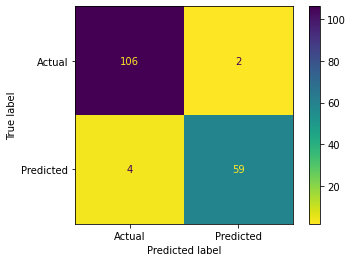

In [ ]:
disp = plot_confusion_matrix(rf_best_kfold, x_test, y_test,
                              display_labels=['Actual','Predicted'],
                              cmap=plt.cm.viridis_r)

# Mathews Correlatiion Coefficient

In [ ]:
matthews_corrcoef(y_test, y_pred_rf_kfold)

0.924397085079466